In [ ]:
# Used Artifitial Neural Networks to predict next day prices in week 2 and investd in the following stocks
# 1) AAPL 2) TSLA

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import yfinance as yf

ticker= ['NVDA','AAPL', 'MSFT', 'AMZN', 'GOOG', 'META', 'TSLA', 'BRK-B', 'AVGO', 'WMT', 'LLY', 'JPM', 'V', 'UNH', 'XOM', 'ORCL', 'MA', 'COST', 'HD', 'PG', 'NFLX' ]

In [4]:

# Load and preprocess the data
#data = pd.read_csv('stock_prices.csv')  # Replace with your file
data = yf.download('AVGO', start="2024-06-20", end="2024-11-30")
closing_prices = data['Close']['AVGO'].values.reshape(-1, 1)

ticker_id=[]
NextDayPrediction=[]
PreviousDayPrice= []
EPS= []
RMSE= []

for i in ticker:
    ticker_id.append(i)
    data = yf.download(i, start="2024-06-20", end="2024-11-21")
    closing_prices = data['Close'][i].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(closing_prices)

    # Create features and labels
    def create_dataset(data, window_size):
        X, y = [], []
        for i in range(len(data) - window_size):
            X.append(data[i:i + window_size])
            y.append(data[i + window_size])
        return np.array(X), np.array(y)

    window_size = 90  # Use the past 10 days to predict the next day
    X, y = create_dataset(scaled_prices, window_size)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the ANN model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for predicting next day price
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Predict the next day's price
    last_days = scaled_prices[-window_size:].reshape(1, -1)
    predicted_price_scaled = model.predict(last_days)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    
    NextDayPrediction.append(predicted_price[0][0])
    pd_price= closing_prices[-1][0]
    PreviousDayPrice.append(pd_price)
    EPS.append(NextDayPrediction-pd_price)

    #print(f"Predicted next day's price: {predicted_price[0][0]}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step - loss: 0.0259 - mae: 0.1314 - val_loss: 0.0120 - val_mae: 0.0940
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0138 - mae: 0.1029 - val_loss: 0.0230 - val_mae: 0.1093
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0193 - mae: 0.1118 - val_loss: 0.0117 - val_mae: 0.0970
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0116 - mae: 0.0829 - val_loss: 0.0177 - val_mae: 0.1054
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0162 - mae: 0.0940 - val_loss: 0.0106 - val_mae: 0.0898
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0099 - mae: 0.0830 - val_loss: 0.0085 - val_mae: 0.0892
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0099 - mae: 0.0837 - val_loss: 0.0098 - val_mae: 0.0863
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0107 - mae: 0.0895 - val_loss: 0.0078 - val_mae: 0.0826
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0065 - mae: 0.0693 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step - loss: 0.3289 - mae: 0.5436 - val_loss: 0.2566 - val_mae: 0.3995
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0899 - mae: 0.2527 - val_loss: 0.1152 - val_mae: 0.3044
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0210 - mae: 0.1233 - val_loss: 0.0842 - val_mae: 0.2876
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0571 - mae: 0.1998 - val_loss: 0.0842 - val_mae: 0.2658
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0854 - mae: 0.2634 - val_loss: 0.0722 - val_mae: 0.2414
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0767 - mae: 0.2509 - val_loss: 0.0533 - val_mae: 0.2163
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0511 - mae: 0.1985 - val_loss: 0.0385 - val_mae: 0.1939
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0281 - mae: 0.1365 - val_loss: 0.0354 - val_mae: 0.1850
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0142 - mae: 0.0936 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - loss: 0.0139 - mae: 0.0957 - val_loss: 0.0362 - val_mae: 0.1731
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0236 - mae: 0.1301 - val_loss: 0.0391 - val_mae: 0.1688
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0117 - mae: 0.0945 - val_loss: 0.0595 - val_mae: 0.2093
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0121 - mae: 0.0834 - val_loss: 0.0715 - val_mae: 0.2228
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0149 - mae: 0.0918 - val_loss: 0.0634 - val_mae: 0.2112
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0114 - mae: 0.0788 - val_loss: 0.0500 - val_mae: 0.1895
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0084 - mae: 0.0677 - val_loss: 0.0408 - val_mae: 0.1693
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0093 - mae: 0.0769 - val_loss: 0.0369 - val_mae: 0.1632
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0108 - mae: 0.0851 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - loss: 5.7615 - mae: 2.3963 - val_loss: 3.8525 - val_mae: 1.9529
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4.3010 - mae: 2.0691 - val_loss: 2.8211 - val_mae: 1.6696
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3.1452 - mae: 1.7674 - val_loss: 1.9978 - val_mae: 1.4015
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2.2499 - mae: 1.4929 - val_loss: 1.3611 - val_mae: 1.1530
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1.5611 - mae: 1.2412 - val_loss: 0.8903 - val_mae: 0.9275
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.0593 - mae: 1.0196 - val_loss: 0.5692 - val_mae: 0.7357
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6937 - mae: 0.8202 - val_loss: 0.3430 - val_mae: 0.5651
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4304 - mae: 0.6384 - val_loss: 0.1835 - val_mae: 0.4039
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2490 - mae: 0.4751 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - loss: 0.1924 - mae: 0.4258 - val_loss: 0.0586 - val_mae: 0.1833
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0779 - mae: 0.2571 - val_loss: 0.0317 - val_mae: 0.1422
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0199 - mae: 0.1038 - val_loss: 0.0527 - val_mae: 0.2163
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0159 - mae: 0.1130 - val_loss: 0.0959 - val_mae: 0.2669
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0417 - mae: 0.1798 - val_loss: 0.1174 - val_mae: 0.3023
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0588 - mae: 0.2205 - val_loss: 0.1100 - val_mae: 0.2914
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0560 - mae: 0.2151 - val_loss: 0.0867 - val_mae: 0.2522
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0410 - mae: 0.1793 - val_loss: 0.0599 - val_mae: 0.2186
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0241 - mae: 0.1365 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - loss: 1.5571 - mae: 1.2433 - val_loss: 0.9639 - val_mae: 0.9682
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.9955 - mae: 0.9917 - val_loss: 0.5677 - val_mae: 0.7344
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6199 - mae: 0.7788 - val_loss: 0.3500 - val_mae: 0.5683
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3731 - mae: 0.5998 - val_loss: 0.1901 - val_mae: 0.4060
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1908 - mae: 0.4227 - val_loss: 0.0868 - val_mae: 0.2504
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0699 - mae: 0.2453 - val_loss: 0.0297 - val_mae: 0.1213
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0153 - mae: 0.1076 - val_loss: 0.0153 - val_mae: 0.1008
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0082 - mae: 0.0691 - val_loss: 0.0264 - val_mae: 0.1375
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0292 - mae: 0.1540 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - loss: 1.2572 - mae: 1.0669 - val_loss: 0.3014 - val_mae: 0.5269
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.8897 - mae: 0.8780 - val_loss: 0.1547 - val_mae: 0.3589
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5873 - mae: 0.6858 - val_loss: 0.0627 - val_mae: 0.2020
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3603 - mae: 0.5120 - val_loss: 0.0294 - val_mae: 0.1245
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2095 - mae: 0.4191 - val_loss: 0.0444 - val_mae: 0.1951
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1260 - mae: 0.3394 - val_loss: 0.0978 - val_mae: 0.2664
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0976 - mae: 0.2765 - val_loss: 0.1726 - val_mae: 0.3833
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1098 - mae: 0.2313 - val_loss: 0.2444 - val_mae: 0.4692
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1424 - mae: 0.2649 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - loss: 0.4214 - mae: 0.6316 - val_loss: 0.1454 - val_mae: 0.3640
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2464 - mae: 0.4775 - val_loss: 0.0673 - val_mae: 0.2296
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1210 - mae: 0.3243 - val_loss: 0.0235 - val_mae: 0.1236
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0472 - mae: 0.1895 - val_loss: 0.0146 - val_mae: 0.1034
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0136 - mae: 0.1059 - val_loss: 0.0379 - val_mae: 0.1605
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0221 - mae: 0.1155 - val_loss: 0.0711 - val_mae: 0.2441
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0496 - mae: 0.1990 - val_loss: 0.0915 - val_mae: 0.2827
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0648 - mae: 0.2338 - val_loss: 0.0884 - val_mae: 0.2777
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0603 - mae: 0.2238 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step - loss: 0.8395 - mae: 0.8800 - val_loss: 0.7913 - val_mae: 0.8863
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4679 - mae: 0.6403 - val_loss: 0.3996 - val_mae: 0.6252
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2137 - mae: 0.3997 - val_loss: 0.1600 - val_mae: 0.3863
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0750 - mae: 0.2344 - val_loss: 0.0397 - val_mae: 0.1661
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0534 - mae: 0.2080 - val_loss: 0.0138 - val_mae: 0.0957
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1062 - mae: 0.2620 - val_loss: 0.0288 - val_mae: 0.1424
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1586 - mae: 0.3407 - val_loss: 0.0413 - val_mae: 0.1641
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1739 - mae: 0.3686 - val_loss: 0.0398 - val_mae: 0.1603
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1542 - mae: 0.3470 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step - loss: 0.2987 - mae: 0.5381 - val_loss: 0.1904 - val_mae: 0.4343
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1219 - mae: 0.3327 - val_loss: 0.0639 - val_mae: 0.2488
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0311 - mae: 0.1522 - val_loss: 0.0088 - val_mae: 0.0805
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0167 - mae: 0.1028 - val_loss: 0.0050 - val_mae: 0.0682
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0467 - mae: 0.1808 - val_loss: 0.0175 - val_mae: 0.1218
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0746 - mae: 0.2493 - val_loss: 0.0226 - val_mae: 0.1414
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0779 - mae: 0.2596 - val_loss: 0.0179 - val_mae: 0.1246
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0618 - mae: 0.2303 - val_loss: 0.0092 - val_mae: 0.0838
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0381 - mae: 0.1757 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - loss: 0.0358 - mae: 0.1574 - val_loss: 0.0264 - val_mae: 0.1394
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0554 - mae: 0.1980 - val_loss: 0.0309 - val_mae: 0.1605
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0276 - mae: 0.1372 - val_loss: 0.0714 - val_mae: 0.2279
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0201 - mae: 0.1179 - val_loss: 0.1100 - val_mae: 0.2961
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0326 - mae: 0.1471 - val_loss: 0.0988 - val_mae: 0.2766
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0279 - mae: 0.1333 - val_loss: 0.0626 - val_mae: 0.2160
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0163 - mae: 0.1060 - val_loss: 0.0362 - val_mae: 0.1738
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0155 - mae: 0.1096 - val_loss: 0.0273 - val_mae: 0.1475
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0211 - mae: 0.1210 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - loss: 0.7006 - mae: 0.8219 - val_loss: 0.2559 - val_mae: 0.4913
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4874 - mae: 0.6815 - val_loss: 0.1630 - val_mae: 0.3867
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3289 - mae: 0.5557 - val_loss: 0.0958 - val_mae: 0.2871
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2112 - mae: 0.4384 - val_loss: 0.0500 - val_mae: 0.1932
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1258 - mae: 0.3272 - val_loss: 0.0220 - val_mae: 0.1086
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0682 - mae: 0.2245 - val_loss: 0.0109 - val_mae: 0.0877
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0336 - mae: 0.1483 - val_loss: 0.0118 - val_mae: 0.0908
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0172 - mae: 0.1041 - val_loss: 0.0214 - val_mae: 0.1191
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0158 - mae: 0.0956 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - loss: 0.8548 - mae: 0.9025 - val_loss: 0.2783 - val_mae: 0.4946
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.6342 - mae: 0.7709 - val_loss: 0.1679 - val_mae: 0.3684
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4445 - mae: 0.6366 - val_loss: 0.0872 - val_mae: 0.2381
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2874 - mae: 0.5000 - val_loss: 0.0405 - val_mae: 0.1140
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1672 - mae: 0.3621 - val_loss: 0.0286 - val_mae: 0.1560
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0852 - mae: 0.2543 - val_loss: 0.0487 - val_mae: 0.2150
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0412 - mae: 0.1911 - val_loss: 0.0955 - val_mae: 0.2701
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0326 - mae: 0.1487 - val_loss: 0.1554 - val_mae: 0.3613
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0494 - mae: 0.1626 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step - loss: 0.2027 - mae: 0.4323 - val_loss: 0.0791 - val_mae: 0.2511
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1010 - mae: 0.2948 - val_loss: 0.0375 - val_mae: 0.1635
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0433 - mae: 0.1698 - val_loss: 0.0183 - val_mae: 0.1126
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0179 - mae: 0.0981 - val_loss: 0.0198 - val_mae: 0.1165
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0184 - mae: 0.1211 - val_loss: 0.0304 - val_mae: 0.1482
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0313 - mae: 0.1578 - val_loss: 0.0411 - val_mae: 0.1683
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0419 - mae: 0.1838 - val_loss: 0.0455 - val_mae: 0.1800
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0446 - mae: 0.1885 - val_loss: 0.0436 - val_mae: 0.1769
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0404 - mae: 0.1794 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - loss: 0.6121 - mae: 0.7403 - val_loss: 0.1061 - val_mae: 0.3147
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3321 - mae: 0.5225 - val_loss: 0.0261 - val_mae: 0.1350
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1509 - mae: 0.3420 - val_loss: 0.0108 - val_mae: 0.0944
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0686 - mae: 0.2316 - val_loss: 0.0416 - val_mae: 0.1741
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0536 - mae: 0.1716 - val_loss: 0.0859 - val_mae: 0.2719
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0718 - mae: 0.1959 - val_loss: 0.1165 - val_mae: 0.3236
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0936 - mae: 0.2340 - val_loss: 0.1225 - val_mae: 0.3332
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1006 - mae: 0.2513 - val_loss: 0.1084 - val_mae: 0.3127
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0927 - mae: 0.2413 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step - loss: 0.5286 - mae: 0.7133 - val_loss: 0.1919 - val_mae: 0.4220
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2855 - mae: 0.5195 - val_loss: 0.0972 - val_mae: 0.2876
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1561 - mae: 0.3769 - val_loss: 0.0501 - val_mae: 0.1883
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0789 - mae: 0.2601 - val_loss: 0.0241 - val_mae: 0.0979
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0355 - mae: 0.1602 - val_loss: 0.0145 - val_mae: 0.0965
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0136 - mae: 0.0961 - val_loss: 0.0183 - val_mae: 0.1345
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0096 - mae: 0.0829 - val_loss: 0.0310 - val_mae: 0.1654
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0180 - mae: 0.1139 - val_loss: 0.0461 - val_mae: 0.1883
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0313 - mae: 0.1544 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step - loss: 1.2157 - mae: 1.0942 - val_loss: 0.5558 - val_mae: 0.7351
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7104 - mae: 0.8332 - val_loss: 0.2731 - val_mae: 0.5122
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3500 - mae: 0.5802 - val_loss: 0.0973 - val_mae: 0.2985
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1236 - mae: 0.3331 - val_loss: 0.0142 - val_mae: 0.0877
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0238 - mae: 0.1303 - val_loss: 0.0176 - val_mae: 0.1200
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0320 - mae: 0.1418 - val_loss: 0.0715 - val_mae: 0.2578
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1020 - mae: 0.2894 - val_loss: 0.1234 - val_mae: 0.3448
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1679 - mae: 0.3867 - val_loss: 0.1442 - val_mae: 0.3739
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1937 - mae: 0.4192 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - loss: 1.4335 - mae: 1.1791 - val_loss: 0.5603 - val_mae: 0.7468
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.8007 - mae: 0.8768 - val_loss: 0.2556 - val_mae: 0.5044
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3874 - mae: 0.6046 - val_loss: 0.0868 - val_mae: 0.2932
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1413 - mae: 0.3499 - val_loss: 0.0113 - val_mae: 0.0885
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0272 - mae: 0.1220 - val_loss: 0.0188 - val_mae: 0.1053
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0326 - mae: 0.1513 - val_loss: 0.0737 - val_mae: 0.2512
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1001 - mae: 0.2909 - val_loss: 0.1199 - val_mae: 0.3292
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1548 - mae: 0.3734 - val_loss: 0.1310 - val_mae: 0.3456
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1668 - mae: 0.3895 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step - loss: 0.0896 - mae: 0.2818 - val_loss: 0.0557 - val_mae: 0.2150
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0154 - mae: 0.1046 - val_loss: 0.0144 - val_mae: 0.0887
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0167 - mae: 0.0948 - val_loss: 0.0083 - val_mae: 0.0783
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0324 - mae: 0.1505 - val_loss: 0.0076 - val_mae: 0.0783
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0326 - mae: 0.1545 - val_loss: 0.0063 - val_mae: 0.0651
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0219 - mae: 0.1195 - val_loss: 0.0073 - val_mae: 0.0592
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0109 - mae: 0.0803 - val_loss: 0.0128 - val_mae: 0.0896
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0061 - mae: 0.0613 - val_loss: 0.0213 - val_mae: 0.1321
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0082 - mae: 0.0764 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - loss: 0.2696 - mae: 0.4906 - val_loss: 0.0452 - val_mae: 0.1873
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1026 - mae: 0.2788 - val_loss: 0.0276 - val_mae: 0.1414
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0333 - mae: 0.1314 - val_loss: 0.0688 - val_mae: 0.2015
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0463 - mae: 0.1912 - val_loss: 0.1046 - val_mae: 0.2787
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0731 - mae: 0.2287 - val_loss: 0.1072 - val_mae: 0.2896
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0779 - mae: 0.2329 - val_loss: 0.0911 - val_mae: 0.2647
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0656 - mae: 0.2132 - val_loss: 0.0700 - val_mae: 0.2279
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0519 - mae: 0.1884 - val_loss: 0.0493 - val_mae: 0.1840
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0388 - mae: 0.1641 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step - loss: 0.5536 - mae: 0.7343 - val_loss: 0.2807 - val_mae: 0.5290
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3928 - mae: 0.6187 - val_loss: 0.1824 - val_mae: 0.4260
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2607 - mae: 0.5033 - val_loss: 0.1019 - val_mae: 0.3179
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1558 - mae: 0.3876 - val_loss: 0.0455 - val_mae: 0.2119
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0778 - mae: 0.2716 - val_loss: 0.0125 - val_mae: 0.1097
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0285 - mae: 0.1591 - val_loss: 7.7751e-04 - val_mae: 0.0270
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0053 - mae: 0.0561 - val_loss: 0.0050 - val_mae: 0.0652
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0039 - mae: 0.0560 - val_loss: 0.0170 - val_mae: 0.1268
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0156 - mae: 0.1165 - val_lo

In [5]:
ANN_analysis= pd.DataFrame()
ANN_analysis['ticker_id']= ticker_id
ANN_analysis['NextDayPrediction']= NextDayPrediction
ANN_analysis['PreviousDayPrice']= PreviousDayPrice
ANN_analysis['EPS']= ANN_analysis['NextDayPrediction']-ANN_analysis['PreviousDayPrice']

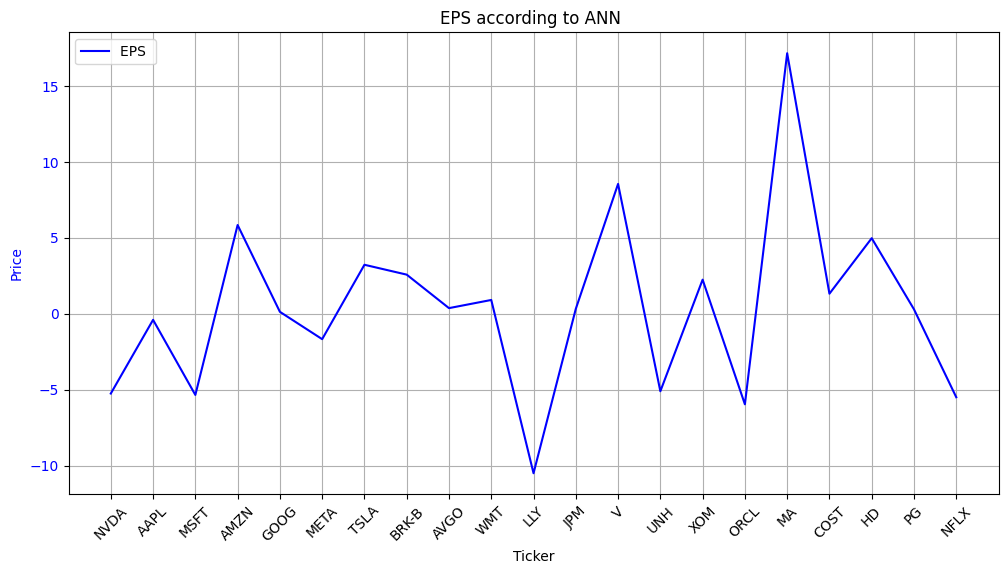

In [7]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot for prices
# ax1.plot(analysis_df.index, analysis_df['PD_price'], label='Actual Price', color='blue')
# ax1.plot(analysis_df.index, analysis_df['ND_Predictions'], label='Predicted Price', color='green', linestyle='--')
ax1.plot(ANN_analysis.index, ANN_analysis['EPS'], label='EPS ', color='blue')
ax1.set_xlabel('Ticker')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.set_xticks(ANN_analysis.index)  # Set tick positions
ax1.set_xticklabels(ANN_analysis['ticker_id'], rotation=45)  # Optionally set tick labels with rotation




# # Bar plot for RMSE
# ax2 = ax1.twinx()
# bars = ax2.bar(analysis_df.index, analysis_df['RMSE'], alpha=0.3, label='RMSE', color='orange')
# ax2.set_ylabel('RMSE', color='orange')
# ax2.tick_params(axis='y', labelcolor='orange')
# ax2.legend(loc='upper right')

# # Add TickerID labels on top of bars
# for bar, ticker_id in zip(bars, analysis_df['ticker_id']):
#     ax2.text(
#         bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
#         bar.get_height(),                  # Y-coordinate (top of the bar)
#         ticker_id,                         # TickerID to display
#         ha='center', va='bottom', fontsize=9, rotation=45, color='black'
#     )

plt.title('EPS according to ANN ')
plt.grid()
plt.show()
